## Context:

Today we are going to be working with the IMDB movie data set.  Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

Before we can start to model, we need to make sure our data is clean an in a usable format.  Therefore we will go through several steps of data cleaning. The code below is not a fully exhaustive list, but includes many of the process you will go through to clean data.  

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Convert a column to a different data type

The most common example of this is converting a string of number to an actual float or integer.  There are two ways you can achieve this.  

1. astype(float) method

`df['DataFrame Column'] = df['DataFrame Column'].astype(float)`
2.  to_numeric method

`df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')`

What is the difference in these two methods?

(1) For a column that contains numeric values stored as strings;

(2) For a column that contains both numeric and non-numeric values. By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.


https://datatofish.com/convert-string-to-float-dataframe/

In [4]:
df['title_year'][0]

2009.0

In [5]:
df['title_year']= pd.to_datetime(df['title_year'], format='%Y')

In [8]:
df['title_year']

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
          ...    
5038   2013-01-01
5039          NaT
5040   2013-01-01
5041   2012-01-01
5042   2004-01-01
Name: title_year, Length: 5043, dtype: datetime64[ns]

### Drop Columns

If you do not plan on using some data in your analysis, feel free to drop those columns. 

In [7]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [9]:
df.shape

(5043, 28)

In [10]:
df.drop(columns=['aspect_ratio', 'plot_keywords'], inplace=True)

In [11]:
df.shape

(5043, 26)

In [13]:
smaller_df=df[['gross','budget']]

In [17]:
smaller_df.head()

,gross,budget
0,760505847.0,237000000.0
1,309404152.0,300000000.0
2,200074175.0,245000000.0
3,448130642.0,250000000.0
4,NaN,NaN


## Investigate the data

In [18]:
df.content_rating

0       PG-13
1       PG-13
2       PG-13
3       PG-13
4         NaN
        ...  
5038      NaN
5039    TV-14
5040      NaN
5041    PG-13
5042       PG
Name: content_rating, Length: 5043, dtype: object

In [19]:
#look at the unique values for ratings
ratings = list(df['content_rating'].unique())
ratings

['PG-13',
 nan,
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 'Not Rated',
 'Unrated',
 'Approved',
 'TV-Y',
 'NC-17',
 'X',
 'TV-Y7',
 'GP',
 'Passed',
 'M']

In [20]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

There are many unique values that don't have a high count or don't make sense to the common user.  How should we handle these?

In [23]:
#create a list of the ratings we want to group
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']

In [24]:
#create a list of the movie ratings we want to maintian
rated = [x for x in ratings if x not in unrated]

In [25]:
rated

['PG-13', 'PG', 'G', 'R']

In [31]:
#create a dictionary with keys of the unrated list values and the value being 'unrated'
unrated_dict = dict.fromkeys(unrated, 'unrated')

In [32]:
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [33]:
#create a dictionary of the rated values
rated_dict  = dict(zip(rated, rated))

In [34]:
rated_dict

{'PG-13': 'PG-13', 'PG': 'PG', 'G': 'G', 'R': 'R'}

unpack 1 dict into another dict,

** unpacks contents of a dictionary

In [35]:
#combine those ditionaries into 1
ratings_map = {**rated_dict,**unrated_dict}
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

#### What does `**` do? 

It basically takes the dictionary passed through and unpacks it.  

https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

https://pynash.org/2013/03/13/unpacking/

In [36]:
# use the pandas map function to change the content_rating column
df['rating'] = df['content_rating'].map(ratings_map)

In [37]:
#compare the two columns
df[['rating', 'content_rating']].tail()

,rating,content_rating
5038,unrated,NaN
5039,unrated,TV-14
5040,unrated,NaN
5041,PG-13,PG-13
5042,PG,PG


R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

## Handling Missing Data:
    


In [24]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1,0,unrated


In [25]:
#creates a dataframe of booleans show where data is missing
df.isna().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,False,False,False


In [26]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.003768
director_name                0.020623
num_critic_for_reviews       0.009915
duration                     0.002974
director_facebook_likes      0.020623
actor_3_facebook_likes       0.004561
actor_2_name                 0.002578
actor_1_facebook_likes       0.001388
gross                        0.175292
genres                       0.000000
actor_1_name                 0.001388
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.004561
facenumber_in_poster         0.002578
movie_imdb_link              0.000000
num_user_for_reviews         0.004164
language                     0.002380
country                      0.000991
content_rating               0.060083
budget                       0.097561
title_year                   0.021416
actor_2_facebook_likes       0.002578
imdb_score                   0.000000
movie_facebook_likes         0.000000
rating      

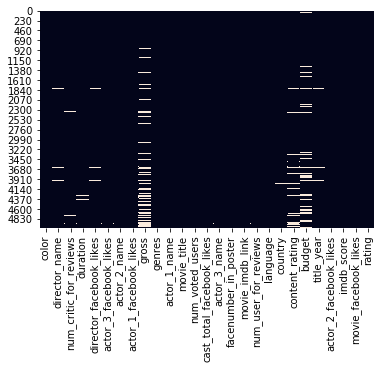

In [27]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

In [28]:
df.groupby('title_year')['gross'].mean()

title_year
1916-01-01             NaN
1920-01-01    3.000000e+06
1925-01-01             NaN
1927-01-01    2.643500e+04
1929-01-01    1.408975e+06
1930-01-01             NaN
1932-01-01             NaN
1933-01-01    2.300000e+06
1934-01-01             NaN
1935-01-01    3.000000e+06
1936-01-01    1.632450e+05
1937-01-01    1.849255e+08
1938-01-01             NaN
1939-01-01    1.104289e+08
1940-01-01    8.035000e+07
1941-01-01             NaN
1942-01-01    1.027972e+08
1943-01-01             NaN
1944-01-01             NaN
1945-01-01             NaN
1946-01-01    2.202500e+07
1947-01-01    7.927000e+03
1948-01-01    2.956000e+06
1949-01-01             NaN
1950-01-01    8.000000e+06
1951-01-01             NaN
1952-01-01    3.600000e+07
1953-01-01    2.050000e+07
1954-01-01    4.934530e+06
1955-01-01             NaN
                  ...     
1987-01-01    4.023326e+07
1988-01-01    4.119035e+07
1989-01-01    4.967845e+07
1990-01-01    7.820397e+07
1991-01-01    5.384450e+07
1992-01-01    6.3

#### Dropping missing rows

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable.  For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [41]:
df.shape

(5043, 27)

In [29]:
df.dropna(subset=['gross'], inplace=True)

In [30]:
df.shape

(4159, 27)

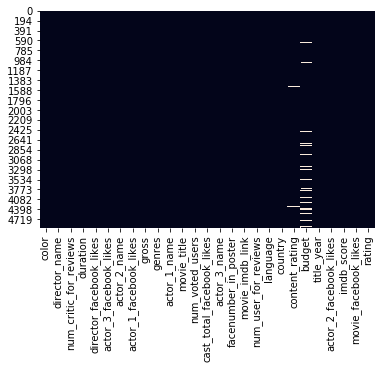

In [31]:
sns.heatmap(df.isnull(), cbar=False)

In [42]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1,0,unrated
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,20000,PG
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,1982,Bipasha Basu,3.0,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,15.0,English,Belgium,R,NaN,2015-01-01,525.0,4.5,677,R
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016-01-01,106.0,8.2,0,unrated
199,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,Rupert Grint,Harry Potter and the Deathly Hallows: Part II,381,11036,Ralph Ineson,1.0,http://www.imdb.com/title/tt1680310/?ref_=fn_t...,2.0,English,UK,NaN,NaN,2011-01-01,570.0,7.5,40,unrated
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016-01-01,106.0,8.2,0,unrated
206,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000.0,NaN,Fantasy,Rupert Grint,Harry Potter and the Deathly Hallows: Part I,252,14719,Alfred Enoch,1.0,http://www.imdb.com/title/tt1571403/?ref_=fn_t...,2.0,English,UK,NaN,NaN,2010-01-01,2000.0,6.4,25,unrated
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,George Peppard,The A-Team,25402,1655,Dwight Schultz,4.0,http://www.imdb.com/title/tt0084967/?ref_=fn_t...,97.0,English,USA,TV-PG,NaN,NaT,554.0,7.6,0,unrated
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,Mathew Buck,"10,000 B.C.",6,5,NaN,0.0,http://www.imdb.com/title/tt1869849/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,7.2,0,unrated
367,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,Morgan Freeman,Ben-Hur,57,13379,Moises Arias,2.0,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,1.0,English,USA,PG-13,NaN,2016-01-01,745.0,6.1,0,PG-13


Quite a few films are still missing the values for budget. We do not want to drop this column because we believe it is an important variable, but we must have a value for each observation in order to use it.

**Talk with a partner to think of different ways you can fill in the missing budget values?**

In [43]:
#you can fill the missing values with the average value of the observations
df['budget'].fillna(df['budget'].mean(), inplace=False)

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
4       3.975262e+07
            ...     
5038    3.975262e+07
5039    3.975262e+07
5040    1.400000e+03
5041    3.975262e+07
5042    1.100000e+03
Name: budget, Length: 5043, dtype: float64

Another way to fill the missing data

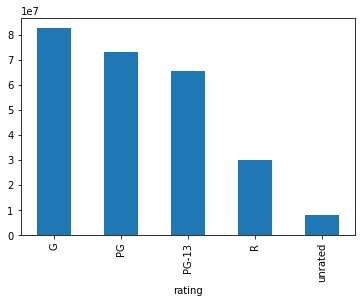

In [55]:
df.groupby('rating')['gross'].mean().plot(kind='bar')

In [56]:
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict()
budget_ratings

{'G': 44999130.8,
 'PG': 48389557.6,
 'PG-13': 54257343.6,
 'R': 33647545.9,
 'unrated': 7549996.4}

In [57]:
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)


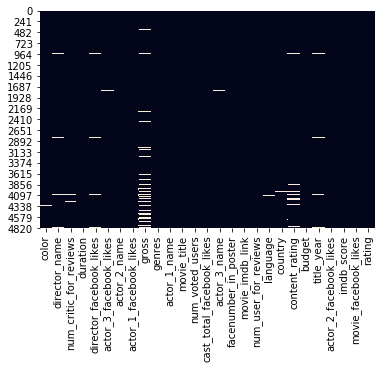

In [58]:
sns.heatmap(df.isnull(), cbar=False)

What statistical test could we use to support our use of this method?

### Handling Categorical Data

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [59]:
df['rating'].value_counts()

R          2118
PG-13      1461
PG          701
unrated     651
G           112
Name: rating, dtype: int64

In [60]:
df['rating'].head(10)

0      PG-13
1      PG-13
2      PG-13
3      PG-13
4    unrated
5      PG-13
6      PG-13
7         PG
8      PG-13
9         PG
Name: rating, dtype: object

In [62]:
pd.get_dummies(df['rating']).head(10)

,G,PG,PG-13,R,unrated
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [63]:
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,1,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,1,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7549996.4,NaT,12.0,7.1,0,unrated,0,0,0,0,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,PG-13,0,0,1,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000,PG,0,1,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5,118000,PG-13,0,0,1,0,0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009-01-01,11000.0,7.5,10000,PG,0,1,0,0,0


## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

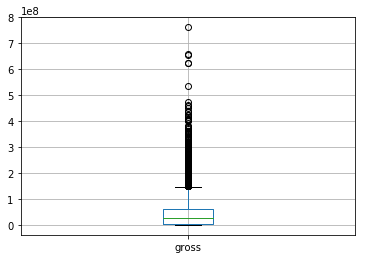

In [42]:
df.boxplot(['gross'])

In [65]:
df.sort_values('gross', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997-01-01,14000.0,7.7,26000,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015-01-01,2000.0,7.0,150000,PG-13,0,0,1,0,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1.0,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,7549996.4,1995-01-01,194.0,6.4,20,unrated,0,0,0,0,1
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0.0,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,2005-01-01,44.0,7.8,4,PG-13,0,0,1,0,0
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,7549996.4,2013-01-01,470.0,7.7,84,unrated,0,0,0,0,1
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,7549996.4,NaT,593.0,7.5,32000,unrated,0,0,0,0,1


In [64]:
# Calculate gross amount that is 3 times above the standard deviation
above_3std = df.gross.mean()+(3*df.gross.std())

In [66]:
above_3std

253827378.8430679

### Use a conditional selection to only return values lower than 3 standard deviations above the mean

In [73]:
#your code here

df = df[df['gross'] < above_3std]

In [74]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000,PG,0,1,0,0,0
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0.0,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006-01-01,10000.0,6.1,0,PG-13,0,0,1,0,0
12,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,Giancarlo Giannini,Quantum of Solace,330784,2023,Rory Kinnear,1.0,http://www.imdb.com/title/tt0830515/?ref_=fn_t...,1243.0,English,UK,PG-13,200000000.0,2008-01-01,412.0,6.7,0,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7000.0,2005-01-01,0.0,6.3,74,unrated,0,0,0,0,1
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992-01-01,20.0,6.9,0,R,0,0,0,1,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011-01-01,205.0,6.4,413,unrated,0,0,0,0,1
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,54257343.6,2012-01-01,719.0,6.3,660,PG-13,0,0,1,0,0


In [72]:
df['actor_1_facebook_likes'].describe()

count      5036.000000
mean       6560.047061
std       15020.759120
min           0.000000
25%         614.000000
50%         988.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

## Creating New columns based on conditions


### Using the df.apply method

In [75]:
def pop_actor(row):
    if row['actor_1_facebook_likes'] >= 30000:
        return 1
    else:
        return 0

In [76]:
%timeit df.apply(pop_actor, axis=1)

78.5 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



### `numpy.where()`

vectorizing our if/else statements

Syntax: 

`np.where( conditional statement  -> bool array, 
            series/array/function()/scalar if True,
            series/array/function()/scalar if False)`

In [77]:
# example
%timeit np.where(df['actor_1_facebook_likes']>=30000, 1, 0)

286 µs ± 32.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
df['is_a_star'] = np.where(df['actor_1_facebook_likes']>=30000, 1, 0)

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We can spped it up even more by accessing the underlying NumPy array using `.values`

In [79]:
# example
%timeit np.where(df['actor_1_facebook_likes'].values>=30000, 1, 0)

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


19.8 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Create your own new column of data using the method above.**

In [83]:
#your code here
df['popular_movie'] = np.where(df['num_voted_users'].values >= 40000, 1, 0)

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Checking multiple conditions

In [51]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,1,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0


In [52]:
def pop_cast(row):
    if row['actor_1_facebook_likes'] >= 30000:
        return 1
    elif row['cast_total_facebook_likes']>=40000:
        return 1
    else:
        return 0

In [53]:
%timeit df.apply(pop_cast, axis=1)

71.4 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

Another data cleaning Resource:

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3